# My First Convolutional Neural Network : CIFAR-10
---
#### 실습목표
1. CNN의 기본 아이디어를 안다.
2. CNN의 구조를 그리고, 코드로 옮길 수 있다.

## Real Game : CNN on CIFAR-10

여기에서는 여러분이 직접 코드를 완성해야 하는 문제가 곳곳에 있습니다!

In [1]:
'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

### Data Loading

In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 139s 1us/step


In [3]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [4]:
labels = { 0 : 'Airplane',
          1 : 'Automobile',
          2 : 'Bird',
          3 : 'Cat',
          4 : 'Deer',
          5 : 'Dog',
          6 : 'Frog',
          7 : 'Horse',
          8 : 'Ship',
          9 : 'Truck' }

print(labels)

{0: 'Airplane', 1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer', 5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}


id = 327
다음 그림은 Dog 입니다.


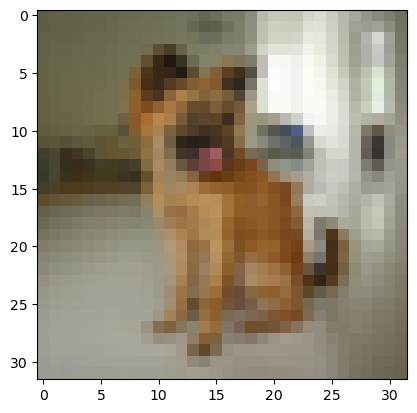

In [5]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id][0]]} 입니다.')
plt.imshow(test_x[id])
plt.show()

### X : 표준화 Scaling (standardization)

$$ X_{scaled} = {{x_{original} - mean(x)}\over{std(x)} } $$

In [10]:
# reshape가 들어가지 않는 이유? 이미 색상 정보까지 포함한 데이터 구조라서.
train_x.shape

(50000, 32, 32, 3)

In [6]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# scaler = StandardScaler()



In [11]:
mean_v, std_v = train_x.mean(), train_x.std()
mean_v, std_v

(120.70756512369792, 64.1500758911213)

In [12]:
train_x_ss = (train_x - mean_v) / std_v
test_x_ss = (test_x - mean_v) / std_v

In [13]:
train_x_ss.mean(), train_x_ss.std() # 사실상 표준편차 1로 봐도 무방하고, 사실상 평균이 0이라고 봐도 무방함. 

(-2.5247951877342226e-17, 1.0000000000000022)

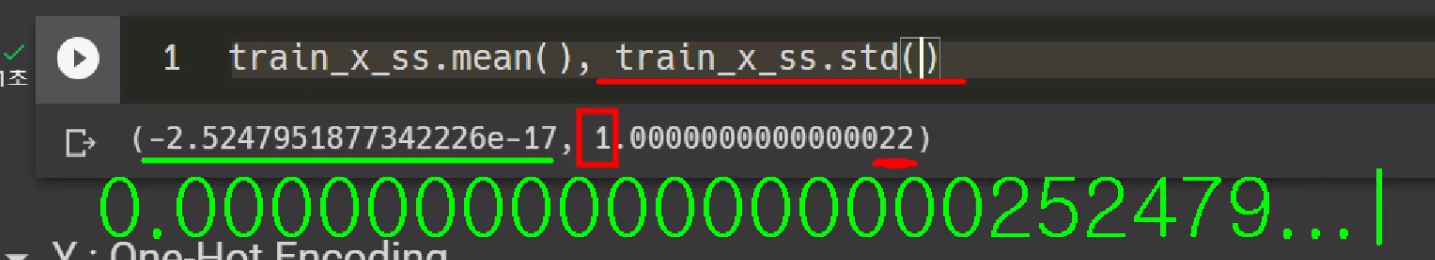

### Y : One-Hot Encoding

In [7]:
from tensorflow.keras.utils import to_categorical

In [14]:
train_y.shape

(50000, 1)

In [15]:
# 넘파이 어레이일 때 set(train_y) 하는 법
class_n = len(np.unique(train_y))

In [16]:
train_y = to_categorical(train_y, class_n)
test_y = to_categorical(test_y, class_n)

In [17]:
train_x_ss.shape, train_y.shape
# x의 구조 변화는 없고 y의 구조편화가 있는 게 보임

((50000, 32, 32, 3), (50000, 10))

- 원래 플랫튼을 활용해서 1차원으로 펼쳐줬는데 이미지 원본 데이터를 보존하면서 
- 클래스 분류를 위한 특징을 잘 뽑아 달라고, 클래스를 구분하기 위한 특징을 뽑아내는 레이어
- 목적은 일단 히든 레이어에 덴스레이어가 없다고 했을 때 컨볼루셔널 쭉쭉 진행하다가 마지막에 플램튼을 진행해 주면
- 알아서 특징별로 잘 분류해 줄 것이라는 기대가 있따.
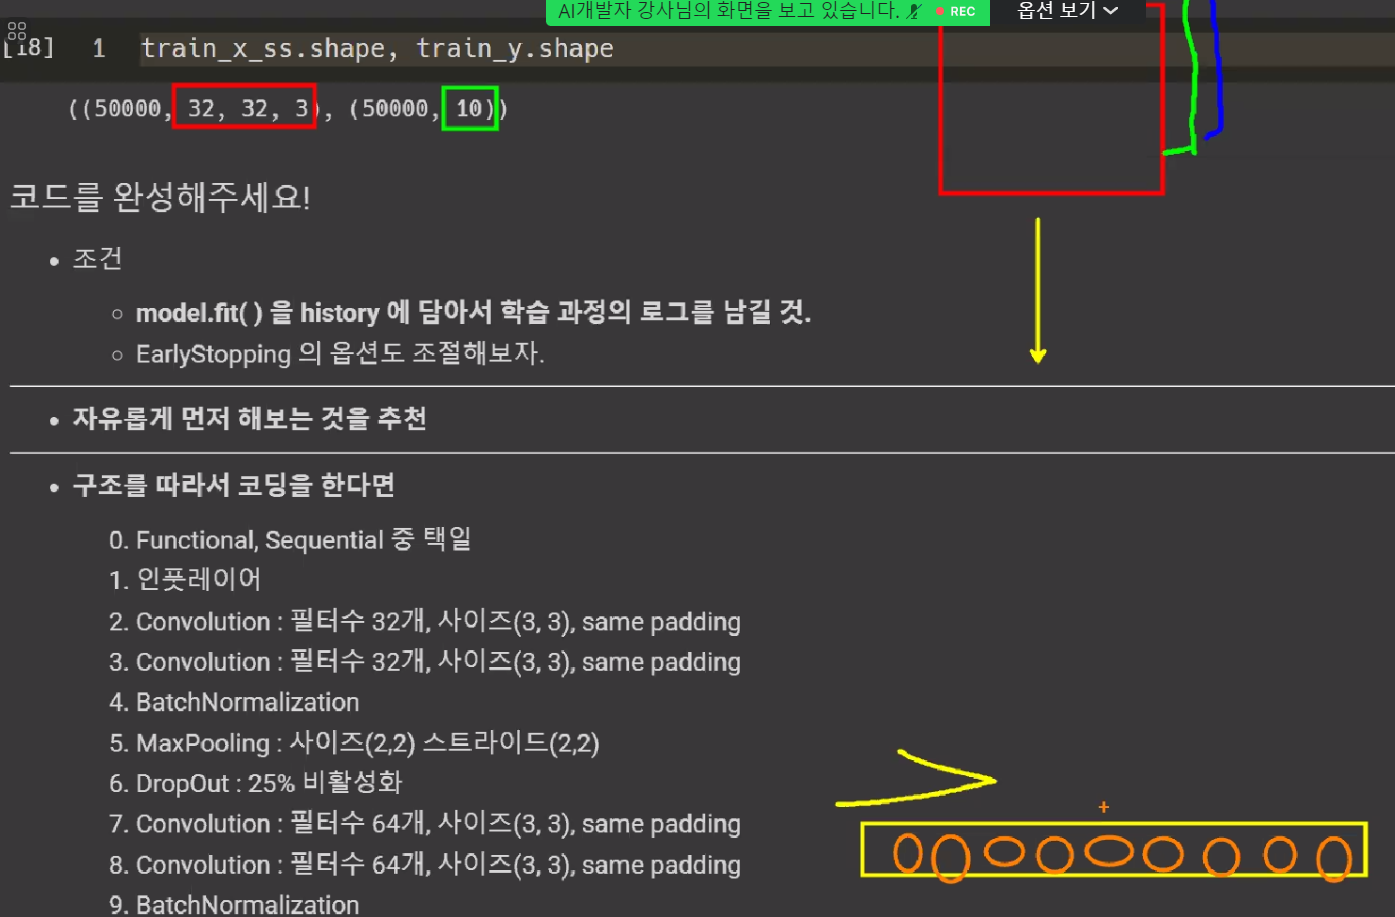

### 코드를 완성해주세요!

- 조건
    - **model.fit( ) 을 history 에 담아서 학습 과정의 로그를 남길 것.**
    - EarlyStopping 의 옵션도 조절해보자.
---

- **자유롭게 먼저 해보는 것을 추천**

---

- **구조를 따라서 코딩을 한다면**
    0. Functional, Sequential 중 택일
    1. 인풋레이어
    2. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    3. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    4. BatchNormalization
    5. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    6. DropOut : 25% 비활성화
    7. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    8. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    9. BatchNormalization
    10. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    11. DropOut : 25% 비활성화
    12. Flatten( )
    13. Fully Connected Layer : 노드 1024개
    14. BatchNormalization
    15. DropOut : 35% 비활성화
    16. 아웃풋레이어



### 성능 평가

In [ ]:
performance_test = model.evaluate(test_x, test_y, batch_size=100)

print('Test Loss : {:.6f},  Test Accuracy : {:.3f}%'.format(performance_test[0], performance_test[1]*100))

In [ ]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [ ]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [ ]:
# 원핫 인코딩 해제 : 카테고리 중 가장 높은 값
train_y = train_y.argmax(axis=1)
test_y = test_y.argmax(axis=1)

In [ ]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y, single_pred_train)
logi_test_accuracy = accuracy_score(test_y, single_pred_test)

print('CNN')
print(f'트레이닝 정확도 : {logi_train_accuracy*100:.2f}%')
print(f'테스트 정확도 : {logi_test_accuracy*100:.2f}%')

In [ ]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id]]} 입니다.')
print(f'모델의 예측 : {labels[single_pred_test[id]]}')

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()

In [ ]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]


print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id]]} 입니다.')
print(f'모델의 예측 : {labels[single_pred_test[id]]}')

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()